In [1]:
import Solve_QKE_Time as solve
import numpy as np
import derivatives as der

In [2]:
def make_ics_eqm(N, Emax, eta_e, eta_mu):
    eps= np.linspace(Emax/N, Emax, N)
    ym0 = np.zeros((N,4))
    
    rho_ee = 1/(np.exp(eps-eta_e)+1)
    rho_mm = 1/(np.exp(eps-eta_mu)+1)

    for i in range(len(ym0)):
        p0 = rho_ee[i] + rho_mm[i]
        pz = (rho_ee[i] - rho_mm[i]) / p0
        ym0[i,:] = [p0,0,0,pz]

    
    rhobar_ee = 1/(np.exp(eps+eta_e)+1)
    rhobar_mm = 1/(np.exp(eps+eta_mu)+1)
    
    
    ym0_bar= np.zeros((N,4))
    for i in range(len(ym0_bar)):
        p0= rhobar_ee[i] + rhobar_mm[i]
        pz = (rhobar_ee[i] - rhobar_mm[i]) / p0
        ym0_bar[i,:]= [p0,0,0,pz]
        
    return der.newarray_maker(ym0,ym0_bar)

In [3]:
eta_e = 0.1
eta_mu = -0.1

y0 = make_ics_eqm(200,10,eta_e, eta_mu)

Run 1 of 10, elapsed time 0.00 hrs (time for run 0.3 min)
Run 2 of 10, elapsed time 0.01 hrs (time for run 0.3 min)
202
Run 3 of 10, elapsed time 0.01 hrs (time for run 0.3 min)
303
Run 4 of 10, elapsed time 0.02 hrs (time for run 0.3 min)
404
Run 5 of 10, elapsed time 0.02 hrs (time for run 0.3 min)
505
Run 6 of 10, elapsed time 0.03 hrs (time for run 0.3 min)
606
Run 7 of 10, elapsed time 0.03 hrs (time for run 0.3 min)
707
Run 8 of 10, elapsed time 0.04 hrs (time for run 0.3 min)
808
Run 9 of 10, elapsed time 0.04 hrs (time for run 0.3 min)
909
Run 10 of 10, elapsed time 0.05 hrs (time for run 0.3 min)
1010


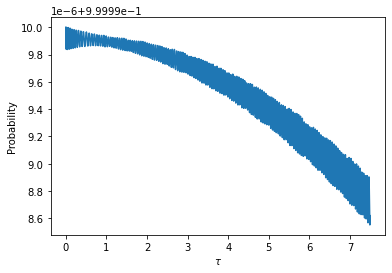

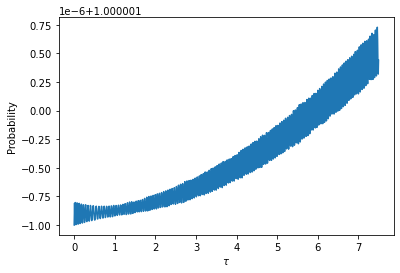

Data saved to file TTFT/test_time_bit_1.npz
1010 time steps saved with dN = 10
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions False
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 1
CPU times: user 5min 1s, sys: 647 ms, total: 5min 2s
Wall time: 5min 2s


In [5]:
%%time
solve.solve_QKE_time(1, y0, True, True, "TTFT", "test_time_bit_1", incl_collisions=False, incl_eta=True, 
                     eta_e = eta_e, eta_mu = eta_mu, progress_saves=True, use_max_run_time=True, max_hours=3./60.)

In [5]:
dat = np.load("TTFT/test_time_bit.npz", allow_pickle=True)

In [6]:
dat['settings']

array({'incl_thermal_term': True, 'incl_anti_neutrinos': True, 'incl_collisions': False, 'incl_eta': True, 'eta_e': 0.1, 'eta_mu': -0.1, 'N': 200, 'eps_max': 10, 'delta m-squared': 2.5e-15, 'sin^2 (2theta)': 0.8, 'T': 1},
      dtype=object)

In [9]:
dat['raw'].item()['nubar3D'].shape

(9488, 200, 4)

In [8]:
dat['prob'].item().keys()

dict_keys(['tau', 'prob_ve', 'prob_vebar'])

In [14]:
def f(N):
    N = N // 10
    return N

In [15]:
x = 100

In [16]:
f(x)

10

In [17]:
x

100

In [10]:
a = np.linspace(1,100,100)
print(a[::10])

[ 1. 11. 21. 31. 41. 51. 61. 71. 81. 91.]


In [12]:
A = np.zeros(5)
AA = np.append(A,1)
print(AA)

[0. 0. 0. 0. 0. 1.]


In [18]:
B = np.zeros((10,3))
BB = np.append(B, [np.ones(3)], axis=0)
print(BB)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]]


In [7]:
tt = np.load("TTFT/test_time_bit_1-times.npy")

In [8]:
tt

array([17.63554311, 18.01732206, 17.60445285, 17.82955694, 17.66247869,
       18.44364405, 18.03114915, 18.31502986, 17.94612384, 18.16769505])

In [9]:
for i in range(10):
    dat = np.load("TTFT/test_time_bit_1-{}.npz".format(i), allow_pickle=True)
    print(dat['raw'].item()['nu3D'][::10].shape)

(11, 200, 4)
(101, 200, 4)
(101, 200, 4)
(101, 200, 4)
(101, 200, 4)
(101, 200, 4)
(101, 200, 4)
(101, 200, 4)
(101, 200, 4)
(101, 200, 4)


In [10]:
data = np.load("TTFT/test_time_bit.npz", allow_pickle=True)
data['raw'].item()['nu3D'].shape

(1910, 200, 4)